In [ ]:
pip install pyshark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install openpyxl

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd

# Create Spark Session
spark = SparkSession.builder.appName("BigDataAnalysis").getOrCreate()

# Load Excel using Pandas
pandas_df = pd.read_excel("/content/Cancer_Data.xlsx", engine='openpyxl')

# Convert Pandas DataFrame to PySpark DataFrame
df = spark.createDataFrame(pandas_df)

# Show Data
df.show(5)


+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

In [ ]:
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
| id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [ ]:
df = df.dropna()


In [ ]:
df.groupBy(df.columns).count().filter("count > 1").show()


+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+-----+
| id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|count|
+---+---------+-----------+------------+------

In [ ]:
df.head(3)

[Row(id=842302, diagnosis='M', radius_mean=17.99, texture_mean=10.38, perimeter_mean=122.8, area_mean=1001.0, smoothness_mean=0.1184, compactness_mean=0.2776, concavity_mean=0.3001, concave points_mean=0.1471, symmetry_mean=0.2419, fractal_dimension_mean=0.07871, radius_se=1.095, texture_se=0.9053, perimeter_se=8.589, area_se=153.4, smoothness_se=0.006399, compactness_se=0.04904, concavity_se=0.05373, concave points_se=0.01587, symmetry_se=0.03003, fractal_dimension_se=0.006193, radius_worst=25.38, texture_worst=17.33, perimeter_worst=184.6, area_worst=2019.0, smoothness_worst=0.1622, compactness_worst=0.6656, concavity_worst=0.7119, concave points_worst=0.2654, symmetry_worst=0.4601, fractal_dimension_worst=0.1189),
 Row(id=842517, diagnosis='M', radius_mean=20.57, texture_mean=17.77, perimeter_mean=132.9, area_mean=1326.0, smoothness_mean=0.08474, compactness_mean=0.07864, concavity_mean=0.0869, concave points_mean=0.07017, symmetry_mean=0.1812, fractal_dimension_mean=0.05667, radius

In [ ]:
df.columns


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

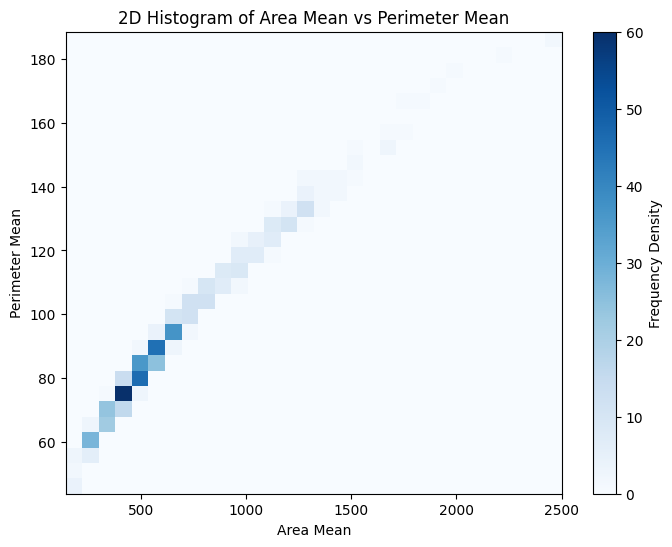

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PySpark DataFrame to Pandas
pandas_df = df.toPandas()

# Define X and Y (Ensure both are numeric columns)
x = pandas_df["area_mean"]
y = pandas_df["perimeter_mean"]  # Choose another numeric column

# Create 2D Histogram
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=30, cmap="Blues")

# Add Labels and Title
plt.xlabel("Area Mean")
plt.ylabel("Perimeter Mean")
plt.title("2D Histogram of Area Mean vs Perimeter Mean")

# Show Colorbar
plt.colorbar(label="Frequency Density")

plt.show()



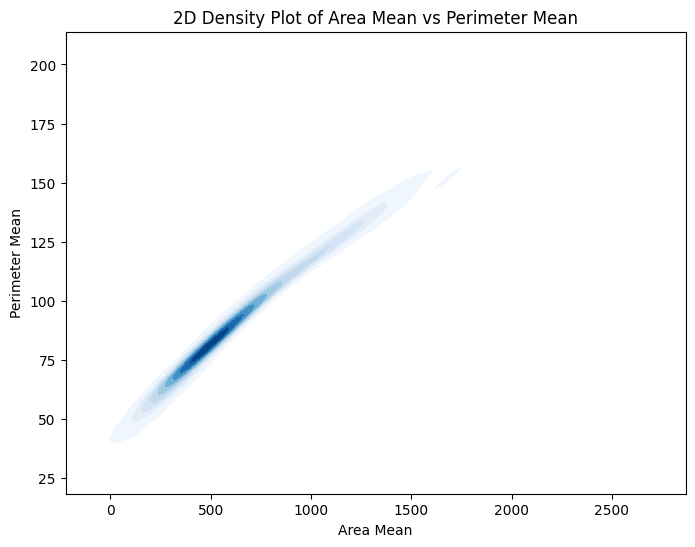

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=pandas_df, x="area_mean", y="perimeter_mean", cmap="Blues", fill=True)

plt.xlabel("Area Mean")
plt.ylabel("Perimeter Mean")
plt.title("2D Density Plot of Area Mean vs Perimeter Mean")

plt.show()


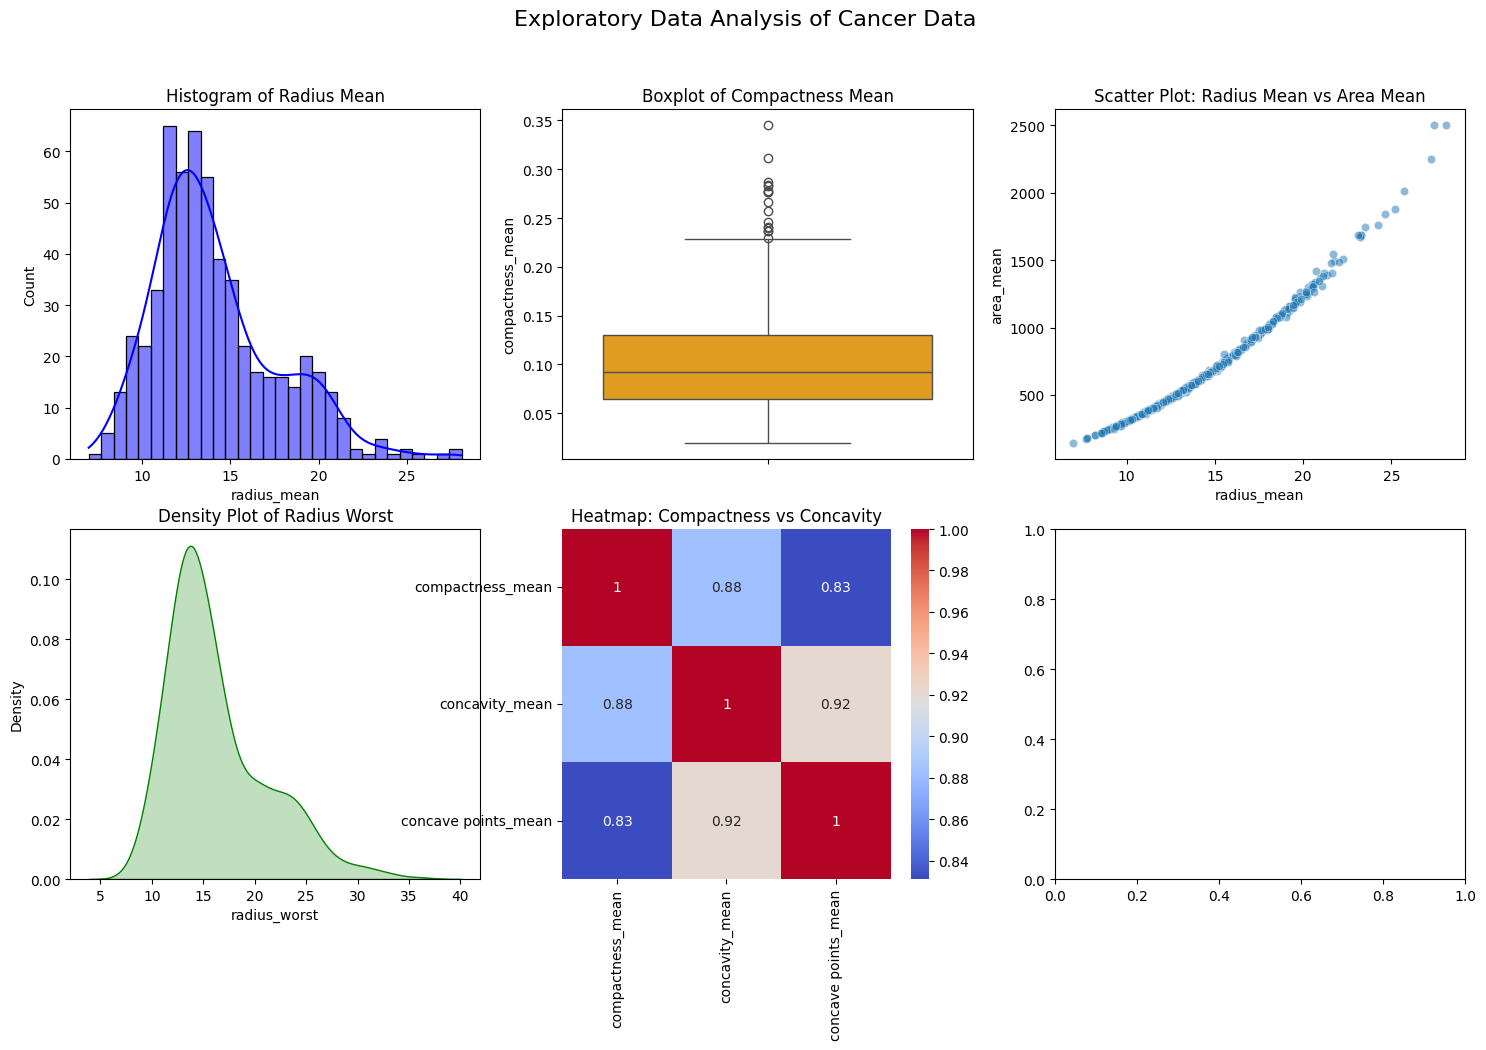

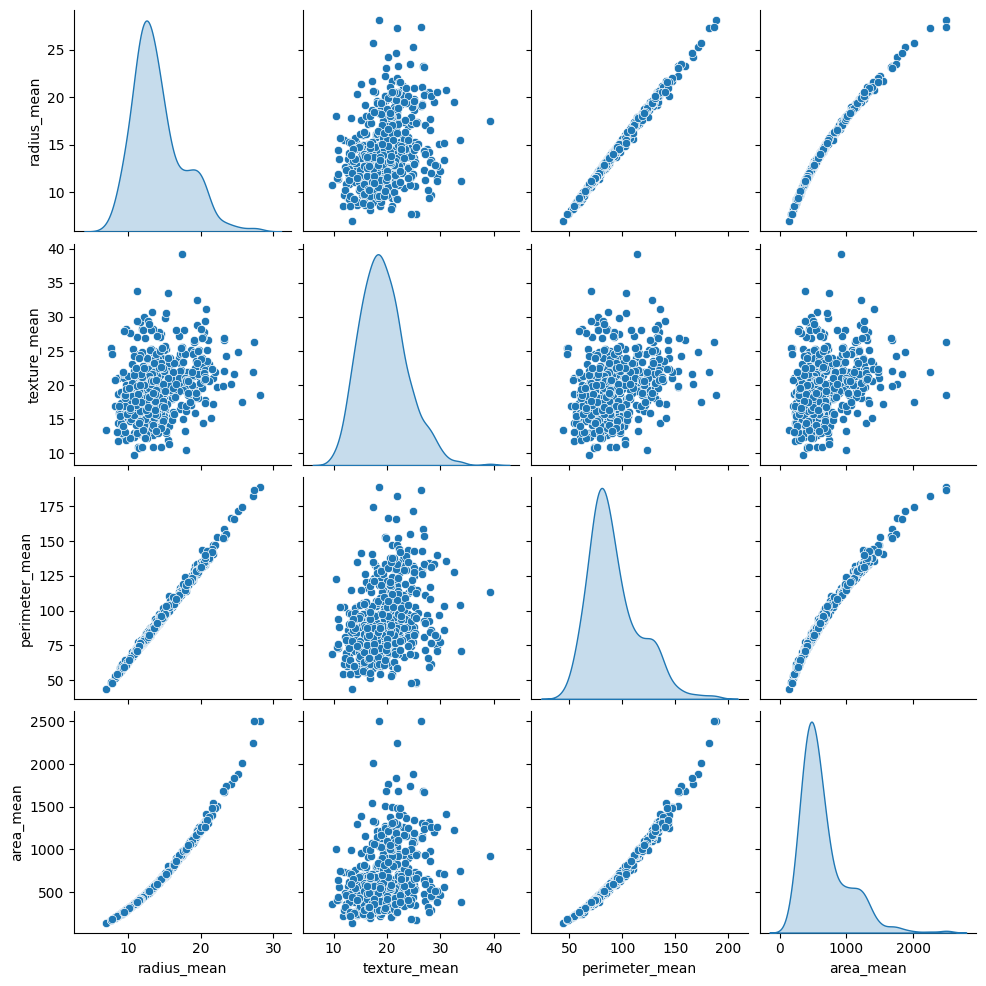

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PySpark DataFrame to Pandas
pandas_df = df.toPandas()

# Set figure size
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Exploratory Data Analysis of Cancer Data", fontsize=16)

# 🔹 Histogram: Distribution of Radius Mean
sns.histplot(pandas_df["radius_mean"], bins=30, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Histogram of Radius Mean")

# 🔹 Boxplot: Checking Outliers in Compactness Mean
sns.boxplot(y=pandas_df["compactness_mean"], color="orange", ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Compactness Mean")

# 🔹 Scatter Plot: Radius Mean vs Area Mean
sns.scatterplot(x=pandas_df["radius_mean"], y=pandas_df["area_mean"], alpha=0.5, ax=axes[0, 2])
axes[0, 2].set_title("Scatter Plot: Radius Mean vs Area Mean")

# 🔹 KDE Plot: Density of Radius Worst
sns.kdeplot(pandas_df["radius_worst"], fill=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title("Density Plot of Radius Worst")

# 🔹 Correlation Heatmap (Compactness & Concavity)
sns.heatmap(pandas_df[["compactness_mean", "concavity_mean", "concave points_mean"]].corr(), annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Heatmap: Compactness vs Concavity")

# 🔹 Pairplot of Key Features (Small Sample)
sns.pairplot(pandas_df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]], diag_kind="kde")
plt.show()
